In [2]:
# In this tutorial, you discovered ensemble methods for deep learning neural networks to reduce
# variance and improve prediction performance. Specically, you learned:
#  Neural network models are nonlinear and have a high variance, which can be frustrating
# when preparing a nal model for making predictions.
#  Ensemble learning combines the predictions from multiple neural network models to reduce
# the variance of predictions and reduce generalization error.
#  Techniques for ensemble learning can be grouped by the element that is varied, such as
# training data, the model, and how predictions are combined.

In [1]:
# In summary, we can list some of the more common and interesting ensemble methods for neural
# networks organized by each element of the method that can be varied, as follows:
#  Varying Training Data (Chapter 22)
# { k-fold Cross-Validation Ensemble.
# { Bootstrap Aggregation (bagging) Ensemble.
# { Random Training Subset Ensemble.
#  Varying Models
# { Multiple Training Run Ensemble (Chapter 20 and Chapter 21).
# { Hyperparameter Tuning Ensemble.
# { Snapshot Ensemble (Chapter 24).
# { Horizontal Epochs Ensemble (Chapter 23).
# { Vertical Representational Ensemble.
#  Varying Combinations
# { Model Averaging Ensemble (Chapter 20).
# { Weighted Average Ensemble (Chapter 21).
# { Stacked Generalization (stacking) Ensemble (Chapter 25).
# { Boosting Ensemble.
# { Model Weight Averaging Ensemble (Chapter 26).
# There is no single best ensemble method; perhaps experiment with a few approaches or let
# the constraints of your project guide you.

In [3]:
# Combine Models From Multiple Runs with Model Averaging Ensemble

Train: 0.847, Test: 0.763


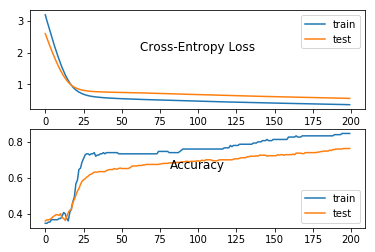

In [8]:
# fit high variance mlp on blobs classification problem
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import  matplotlib.pyplot as  pyplot

%matplotlib inline

# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(15, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

> 0.791
> 0.771
> 0.766
> 0.786
> 0.757
> 0.711
> 0.763
> 0.751
> 0.794
> 0.754
> 0.794
> 0.771
> 0.800
> 0.786
> 0.760
> 0.783
> 0.757
> 0.766
> 0.766
> 0.791
> 0.774
> 0.757
> 0.786
> 0.729
> 0.760
> 0.734
> 0.791
> 0.734
> 0.717
> 0.737
Scores Mean: 0.737, Standard Deviation: 0.000


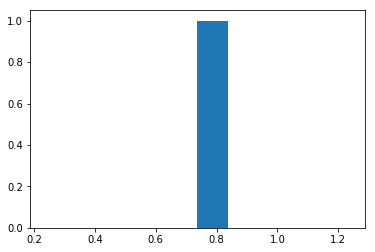

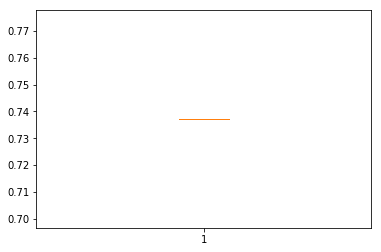

In [11]:
# demonstrate high variance of mlp model on blobs classification problem
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from numpy import mean
from numpy import std
from matplotlib import pyplot
# fit and evaluate a neural net model on the dataset
def evaluate_model(trainX, trainy, testX, testy):
    # define model
    model = Sequential()
    model.add(Dense(15, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=200, verbose=0)
    # evaluate the model
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return test_acc
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# repeated evaluation
n_repeats = 30
scores = list()
for _ in range(n_repeats):
    score = evaluate_model(trainX, trainy, testX, testy)
    print('> %.3f' % score)
scores.append(score)
# summarize the distribution of scores
print('Scores Mean: %.3f, Standard Deviation: %.3f' % (mean(scores), std(scores)))
# histogram of distribution
pyplot.hist(scores, bins=10)
pyplot.show()
# boxplot of distribution
pyplot.boxplot(scores)
pyplot.show()

1
> 0.769
2
> 0.771
3
> 0.774
4
> 0.766
5
> 0.769
6
> 0.771
7
> 0.771
8
> 0.774
9
> 0.774
10
> 0.771
11
> 0.771
12
> 0.771
13
> 0.771
14
> 0.771
15
> 0.771
16
> 0.771
17
> 0.771
18
> 0.771
19
> 0.771
20
> 0.771


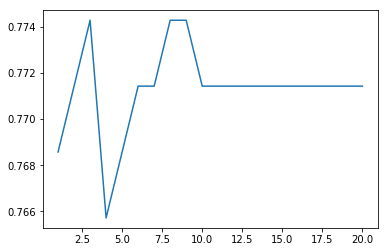

In [13]:
# model averaging ensemble and a study of ensemble size on test accuracy
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
# Model Averaging Ensemble Case Study
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from numpy import array
from numpy import argmax
import numpy
# fit model on dataset
def fit_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(Dense(15, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=200, verbose=0)
    return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result
    # evaluate a specific number of members in an ensemble

def evaluate_n_members(members, n_members, testX, testy):
    # select a subset of members
    subset = members[:n_members]
    print(len(subset))
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)


# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = int(0.3 * X.shape[0])
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
trainy = to_categorical(trainy)
# fit all models
n_members = 20

members = [fit_model(trainX, trainy) for _ in range(n_members)]
# evaluate different numbers of ensembles
scores = list()
for i in range(1, n_members+1):
    score = evaluate_n_members(members, i, testX, testy)
    print('> %.3f' % score)
    scores.append(score)
# plot score vs number of ensemble members
# Model Averaging Ensemble Case Study
x_axis = [i for i in range(1, n_members+1)]
pyplot.plot(x_axis, scores)
pyplot.show()

In [15]:
# repeated evaluation of model averaging ensemble on blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy import argmax
from numpy import mean
from numpy import std
import numpy

# fit model on dataset
def fit_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(Dense(15, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    # 20.3. Model Averaging Ensemble Case Study 395
    model.fit(trainX, trainy, epochs=200, verbose=0)
    return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

# evaluate ensemble model
def evaluate_members(members, testX, testy):
    # make prediction
    yhat = ensemble_predictions(members, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)

In [16]:
# Weighted Average Ensemble Case Study In

Train: 0.830, Test: 0.808


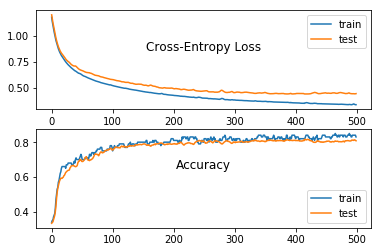

In [17]:
# develop an mlp for blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

> 10: single=0.808, ensemble=0.812
Accuracy 0.808 (0.000)


ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

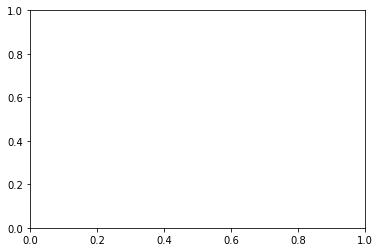

In [18]:
# model averaging ensemble for the blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
import numpy
from numpy import array
from numpy import argmax
# fit model on dataset
def fit_model(trainX, trainy):
    trainy_enc = to_categorical(trainy)
    # define model
    model = Sequential()
    model.add(Dense(25, input_dim=2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy_enc, epochs=500, verbose=0)
    return model

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    #  Weighted Average Ensemble Case Study 407
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
    # select a subset of members
    subset = members[:n_members]
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate accuracy
    return accuracy_score(testy, yhat)


# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# fit all models
n_members = 10
members = [fit_model(trainX, trainy) for _ in range(n_members)]
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(members)+1):
    # evaluate model with i members
    ensemble_score = evaluate_n_members(members, i, testX, testy)
    # evaluate the i'th model standalone
    testy_enc = to_categorical(testy)
    _, single_score = members[i-1].evaluate(testX, testy_enc, verbose=0)
# summarize this step
print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
ensemble_scores.append(ensemble_score)
single_scores.append(single_score)
# summarize average accuracy of a single final model
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))
# plot score vs number of ensemble members
x_axis = [i for i in range(1, len(members)+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()